In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [2]:
hk_est = pd.read_csv('data/estates/hk.csv')
hk_est.date = pd.to_datetime(hk_est.date, format='%Y-%m-%d')
hk_est = hk_est.set_index('date')

hk_stk = pd.read_csv('data/stocks/^HSI.csv', header=0, names=['date', 'price'])
hk_stk.date = pd.to_datetime(hk_stk.date, format='%m/%d/%Y')
hk_stk = hk_stk.set_index('date')

In [3]:
hk_est.head()

,price
date,
1993-01-01,84.4
1993-02-01,85.2
1993-03-01,85.7
1993-04-01,87.5
1993-05-01,90.7


In [4]:
hk_stk.head()

,price
date,
1986-11-30,2568.300049
1986-12-31,2553.300049
1987-01-31,2877.899902
1987-02-28,2713.800049
1987-03-31,2659.899902


In [5]:
# Normalize by 1993-01-01

# ESTATE
est_norm = hk_est.price[0]
hk_est['norm_val'] = hk_est.price / est_norm
hk_est.head()

,price,norm_val
date,,
1993-01-01,84.4,1.000000
1993-02-01,85.2,1.009479
1993-03-01,85.7,1.015403
1993-04-01,87.5,1.036730
1993-05-01,90.7,1.074645


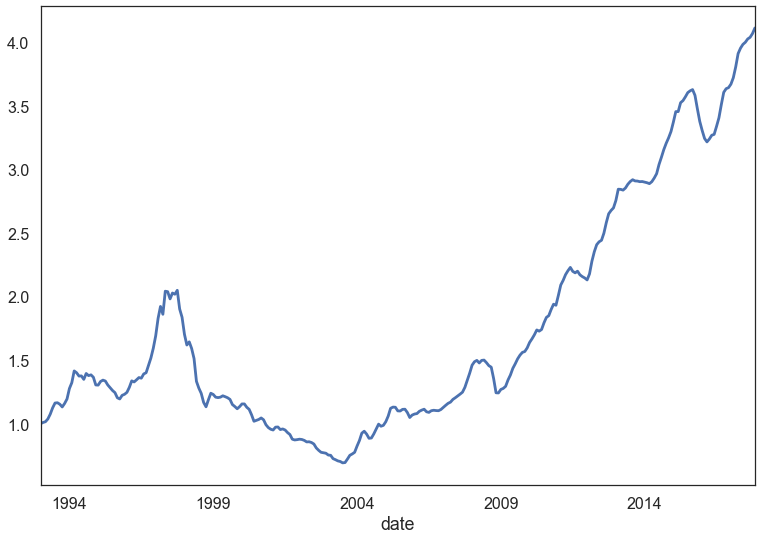

In [7]:
hk_est.norm_val.plot()

In [12]:
hk_stk[hk_stk.index.year == 1993]

,price
date,
1993-01-31,6352.000000
1993-02-28,6388.899902
1993-03-31,6830.500000
1993-04-30,7372.200195
1993-05-31,7099.299805
1993-06-30,6989.000000
1993-07-31,7549.700195
1993-08-31,7676.200195
1993-09-30,9329.099609


In [13]:
# STOCK
stk_norm = hk_stk[hk_stk.index.year == 1993].price[0]
hk_stk['norm_val'] = hk_stk.price / stk_norm
hk_stk.head()

,price,norm_val
date,,
1986-11-30,2568.300049,0.404329
1986-12-31,2553.300049,0.401968
1987-01-31,2877.899902,0.453070
1987-02-28,2713.800049,0.427236
1987-03-31,2659.899902,0.418750


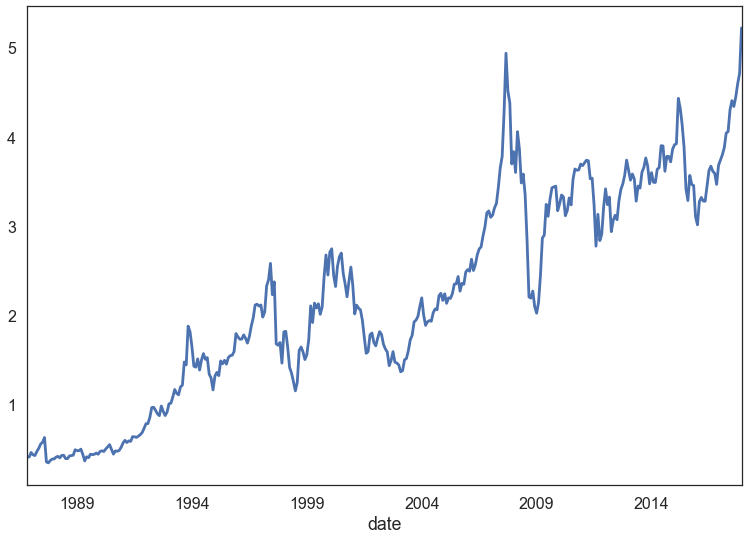

In [14]:
hk_stk.norm_val.plot()

In [21]:
hk_stk.index

DatetimeIndex(['1986-11-30', '1986-12-31', '1987-01-31', '1987-02-28',
               '1987-03-31', '1987-04-30', '1987-05-31', '1987-06-30',
               '1987-07-31', '1987-08-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=374, freq=None)

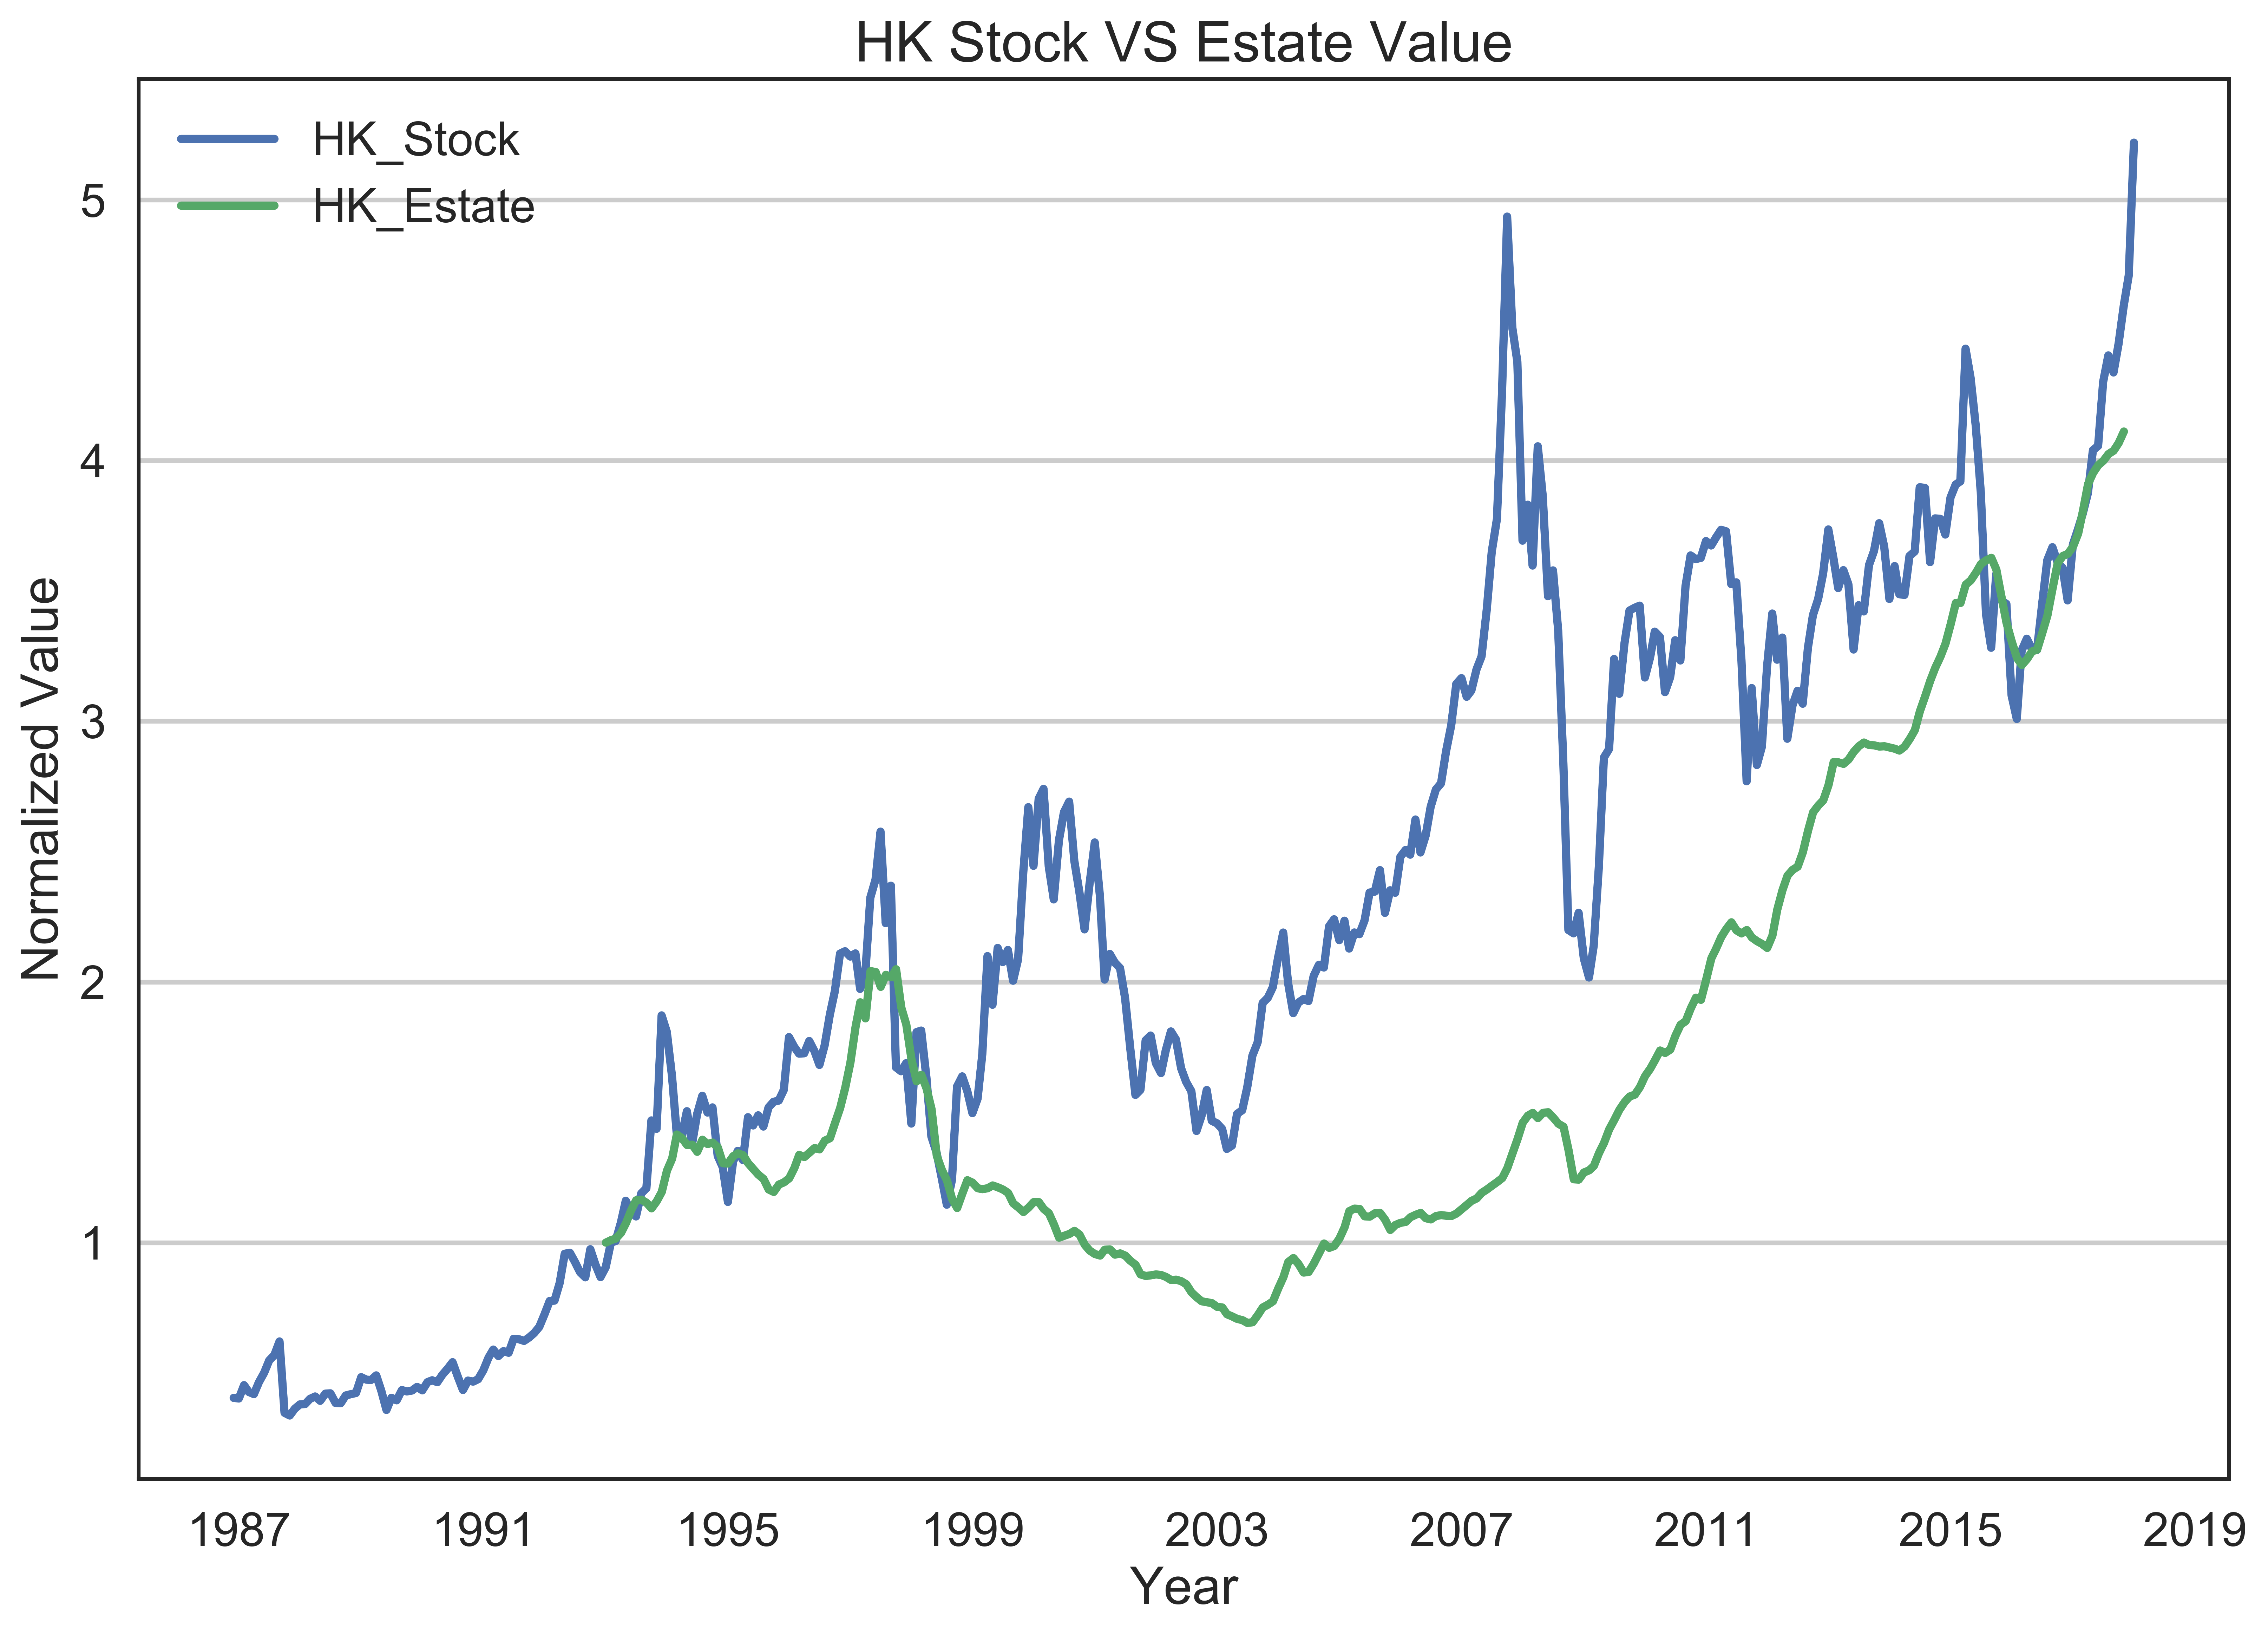

In [37]:
# Comparison - on 1993

plt.figure(dpi=600)
plt.plot(hk_stk.norm_val, label='HK_Stock')
plt.plot(hk_est.norm_val, label='HK_Estate')
plt.legend()
plt.title('HK Stock VS Estate Value, Normalized on 1993')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.gca().yaxis.grid(True)

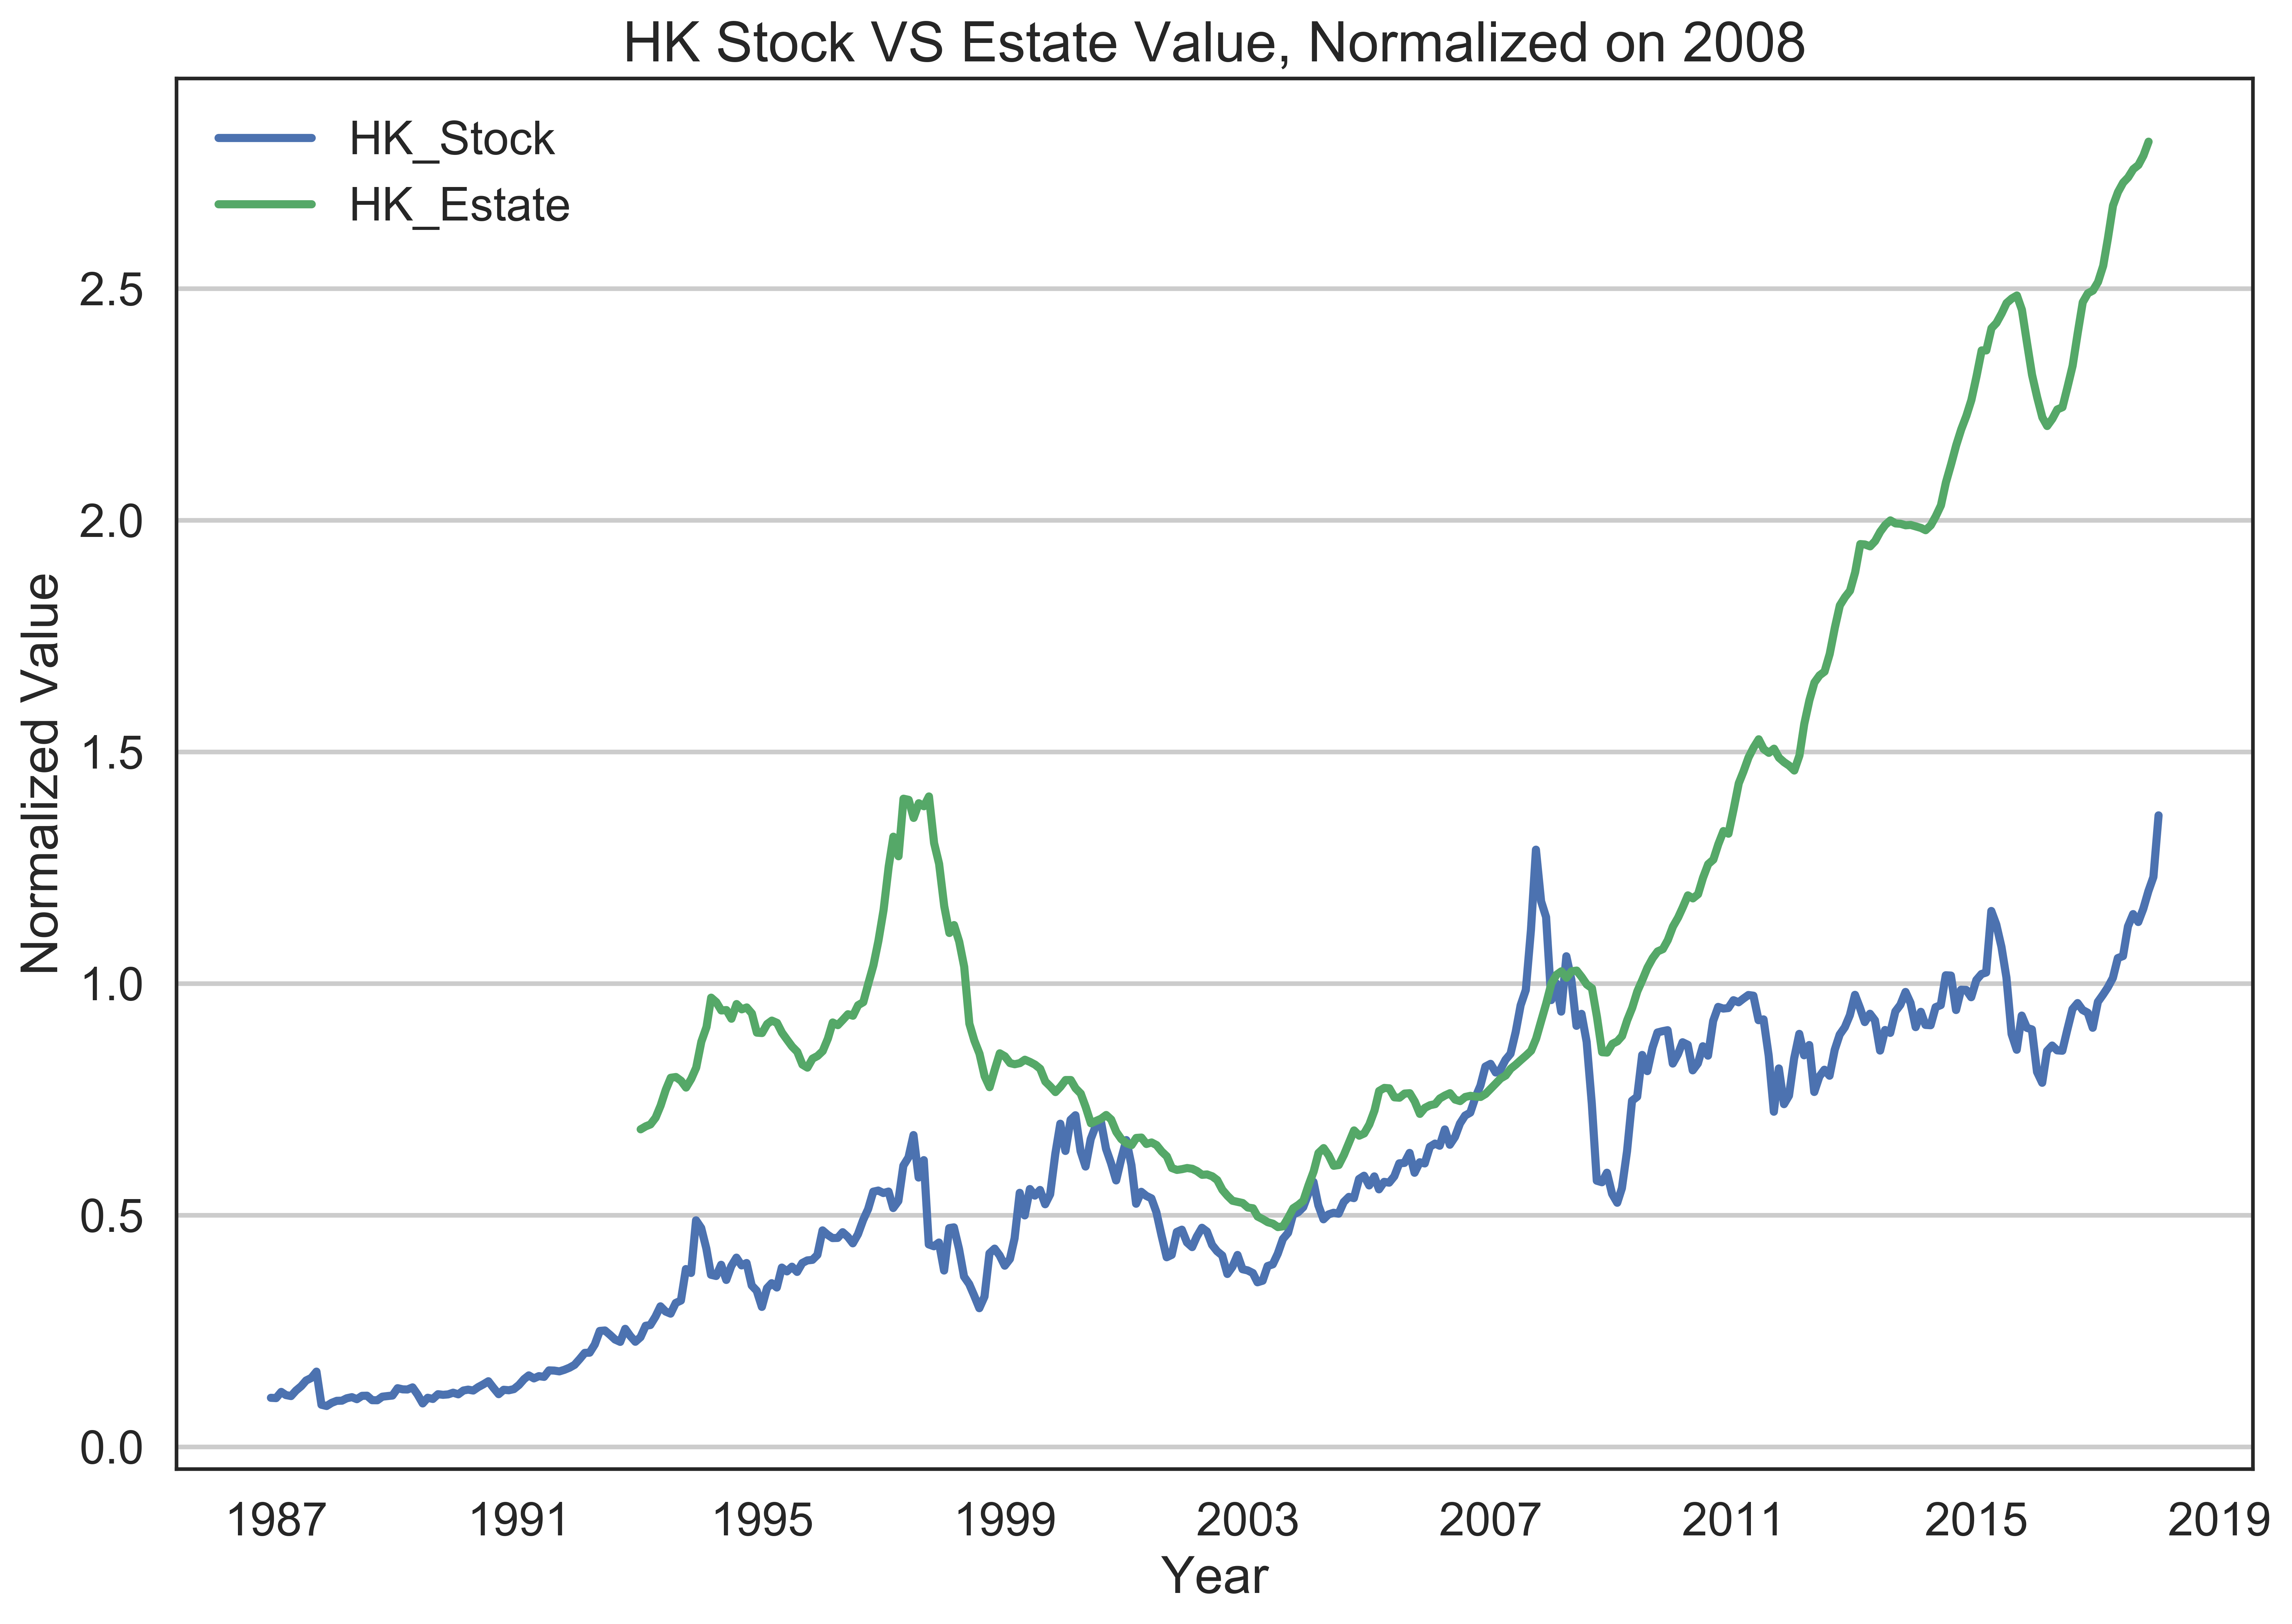

In [40]:
# Normalize by 2008-01-01
def normalize_year(year, hk_est, hk_stk):

    # ESTATE
    est_norm = hk_est[hk_est.index.year == year].price[0]
    hk_est['norm_val'] = hk_est.price / est_norm
    hk_est.head()

    # STOCK
    stk_norm = hk_stk[hk_stk.index.year == year].price[0]
    hk_stk['norm_val'] = hk_stk.price / stk_norm
    hk_stk.head()

    # Comparison
    plt.figure(dpi=600)
    plt.plot(hk_stk.norm_val, label='HK_Stock')
    plt.plot(hk_est.norm_val, label='HK_Estate')
    plt.legend()
    plt.title('HK Stock VS Estate Value, Normalized on ' + str(year))
    plt.xlabel('Year')
    plt.ylabel('Normalized Value')
    plt.gca().yaxis.grid(True)
    
normalize_year(2008, hk_est, hk_stk)